# Master Thesis Data Analysis Python

## 1. Load in data

In [1]:
import os

print(os.getcwd())
os.chdir("C:/Users/siriv/Downloads/master_thesis/master_thesis_git/")
print(os.getcwd())

C:\Users\siriv\Downloads\master_thesis\master_thesis_git
C:\Users\siriv\Downloads\master_thesis\master_thesis_git


In [2]:
# import packages
import pandas as pd



# load in data
data = pd.read_csv("data/data_model.csv")
train = pd.read_csv("data/train_model.csv")
train_downsampled = pd.read_csv("data/train_model_downsampled.csv")
train_upsampled = pd.read_csv("data/train_model_upsampled.csv")
train_rose = pd.read_csv("data/train_model_rose.csv")
test = pd.read_csv("data/test_model.csv")

data = data.drop(["Unnamed: 0"], axis = 1)
train = train.drop(["Unnamed: 0"], axis = 1)
train_downsampled = train_downsampled.drop(["Unnamed: 0"], axis = 1)
train_upsampled = train_upsampled.drop(["Unnamed: 0"], axis = 1)
train_rose = train_rose.drop(["Unnamed: 0"], axis = 1)
test = test.drop(["Unnamed: 0"], axis = 1)

data.shape, train.shape, train_downsampled.shape, train_upsampled.shape, train_rose.shape, test.shape

((10720, 24), (9064, 24), (4256, 24), (13872, 24), (9064, 13), (1656, 24))

In [3]:
train["decision"].value_counts()

1    6936
0    2128
Name: decision, dtype: int64

## 2. Prepare data for analysis

In [4]:
# check datatypes
print(train.dtypes)

lfdn                      int64
purchase_CHO              int64
purchase_PA               int64
purchase_GB               int64
rank_GB                   int64
rank_CHO                  int64
rank_CHEESE               int64
rank_WHEAT                int64
rank_TOM                  int64
age                       int64
gender                   object
country                   int64
education                object
occupation               object
av_income                 int64
environment              object
Country_Name             object
Generation               object
av_income_factorized     object
choice                   object
decision                  int64
price_cn                float64
price_no_cn             float64
product_type             object
dtype: object


In [5]:
train["decision"].value_counts()

1    6936
0    2128
Name: decision, dtype: int64

In [6]:
# get feature matrix and outcome
X_train = train.drop(["decision"], axis = 1)
X_train_ds = train_downsampled.drop(["decision"], axis = 1)
X_train_us = train_upsampled.drop(["decision"], axis = 1)
X_train_rose = train_rose.drop(["decision"], axis = 1)
X_test = test.drop(["decision"], axis = 1)

y_train = train["decision"]
y_train_ds = train_downsampled["decision"]
y_train_us = train_upsampled["decision"]
y_train_rose = train_rose["decision"]
y_test = test["decision"]

X_train.shape, X_train_ds.shape, X_train_us.shape, X_train_rose.shape, X_test.shape, y_train.shape, y_train_ds.shape, y_train_us.shape, y_train_rose.shape, y_test.shape

((9064, 23),
 (4256, 23),
 (13872, 23),
 (9064, 12),
 (1656, 23),
 (9064,),
 (4256,),
 (13872,),
 (9064,),
 (1656,))

In [7]:
# keep variables relevant for the analysis
drop_var = ["rank_GB", "rank_CHO", "rank_CHEESE", "rank_WHEAT", "rank_TOM", "country", "av_income", "Generation", "lfdn"]
X_train = X_train.drop(drop_var, axis = 1)
X_test = X_test.drop(drop_var, axis = 1)

# categorical features
cat_features = ["education", "occupation", "purchase_CHO", "purchase_PA", "purchase_GB", "gender",
               "Country_Name", "av_income_factorized", "choice", "product_type"]    # meow i guess
num_features = [feature for feature in X_train.columns if feature not in cat_features]

cat_features, num_features

(['education',
  'occupation',
  'purchase_CHO',
  'purchase_PA',
  'purchase_GB',
  'gender',
  'Country_Name',
  'av_income_factorized',
  'choice',
  'product_type'],
 ['age', 'environment', 'price_cn', 'price_no_cn'])

In [8]:
# create dataframe for variables that are supposed to be numeric here
X_train_num = X_train[num_features]
X_test_num = X_test[num_features]

# check datatypes
print(X_train_num.dtypes)

# check unique values of factor variable
X_train_num["environment"].unique()

age              int64
environment     object
price_cn       float64
price_no_cn    float64
dtype: object


array(['Not priority', 'Priority'], dtype=object)

In [9]:
# change factor variables to numeric
X_train_num["environment"].replace(["Priority", "Not priority"], [0, 1], inplace = True)
X_test_num["environment"].replace(["Priority", "Not priority"], [0, 1], inplace = True)

# change the datatypes of the numeric variables to float64
X_train_num = X_train_num.astype("float64")
X_test_num = X_test_num.astype("float64")

# check all datatypes
print(X_train_num.dtypes)

age            float64
environment    float64
price_cn       float64
price_no_cn    float64
dtype: object


C:\Users\siriv\AppData\Local\Temp\ipykernel_24784\998637070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_num["environment"].replace(["Priority", "Not priority"], [0, 1], inplace = True)
C:\Users\siriv\AppData\Local\Temp\ipykernel_24784\998637070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_num["environment"].replace(["Priority", "Not priority"], [0, 1], inplace = True)


In [10]:
# check variables
for var in X_train_num.columns:
    print(var, ":")
    print(X_train_num[var].unique())
    print()

age :
[26. 28. 24. 25. 23. 29. 21. 20. 27. 22. 59. 55. 60. 58. 31. 53. 42. 56.
 37. 54. 61. 43. 48. 52. 57. 49. 50. 44. 47. 45. 39. 34. 33. 46. 38. 30.
 68. 71. 36. 73. 64. 72. 62. 32. 63. 35. 65. 18. 17. 41. 77. 81. 67. 66.
 19. 74. 40. 69. 78.]

environment :
[1. 0.]

price_cn :
[3.49 4.99 6.59 1.09 1.79 2.49 0.79 1.29]

price_no_cn :
[3.49 4.99 6.59 1.09 1.79 2.49 0.79 1.29]



In [11]:
# one-hot encode factor columns
X_train_fc = X_train[cat_features]
X_test_fc = X_test[cat_features]

X_train_fc.shape, X_test_fc.shape

((9064, 10), (1656, 10))

In [12]:
X_train_fc.dtypes

education               object
occupation              object
purchase_CHO             int64
purchase_PA              int64
purchase_GB              int64
gender                  object
Country_Name            object
av_income_factorized    object
choice                  object
product_type            object
dtype: object

In [13]:
X_train_fc = X_train_fc.astype("object")
X_test_fc = X_test_fc.astype("object")

X_train_fc.dtypes

education               object
occupation              object
purchase_CHO            object
purchase_PA             object
purchase_GB             object
gender                  object
Country_Name            object
av_income_factorized    object
choice                  object
product_type            object
dtype: object

In [14]:
from sklearn.preprocessing import OneHotEncoder

# set up encoder
oh_1 = OneHotEncoder(sparse = False, handle_unknown = "error")

# fit one-hot encoder on whole data to be sure to get all options
oh_1.fit(data[cat_features])

# transform train and test data according to fitted encoder
X_train_fc = oh_1.transform(X_train_fc)
X_test_fc = oh_1.transform(X_test_fc)

X_train_fc.shape, X_test_fc.shape

((9064, 77), (1656, 77))

In [15]:
# name variables
cat_features_names = [f"{col}_{cat}" for i, col in enumerate(cat_features) for cat in oh_1.categories_[i][0:]]
cat_features_names[:10]

["education_Bachelor's Degree",
 "education_Master's Degree",
 'education_None',
 'education_Ph.D. or higher',
 'education_Secondary School',
 'education_Secondary School Academic',
 'education_Secondary School General',
 'occupation_Employed',
 'occupation_In education or vocational training',
 'occupation_Looking for employment']

In [16]:
# add variable names to dataframe of categorical features
X_train_fc = pd.DataFrame(X_train_fc, columns = cat_features_names)
X_test_fc = pd.DataFrame(X_test_fc, columns = cat_features_names)

X_train_fc.shape, X_test_fc.shape

((9064, 77), (1656, 77))

In [17]:
# standardize numeric features
from sklearn.preprocessing import StandardScaler

X_num_feature_names = X_train_num.columns

scale_1 = StandardScaler()
X_train_num = scale_1.fit_transform(X_train_num)
X_test_num = scale_1.transform(X_test_num)
X_train_num = pd.DataFrame(X_train_num, columns = X_num_feature_names)
X_test_num = pd.DataFrame(X_test_num, columns = X_num_feature_names)

X_train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9064 entries, 0 to 9063
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9064 non-null   float64
 1   environment  9064 non-null   float64
 2   price_cn     9064 non-null   float64
 3   price_no_cn  9064 non-null   float64
dtypes: float64(4)
memory usage: 283.4 KB


In [18]:
# concat numerical and categorical dataframes
print("Expected number of columns: ", len(X_train_num.columns) + len(X_train_fc.columns))
X_train = pd.concat([X_train_num, X_train_fc], axis = 1).reindex(X_train_num.index)
X_test = pd.concat([X_test_num, X_test_fc], axis = 1).reindex(X_test_num.index)
print("Number of columns: ", len(X_train.columns))

Expected number of columns:  81
Number of columns:  81


In [19]:
# # label-encode y
# import numpy as np

# y_train = pd.DataFrame(np.where(y_train == 2, 1, 0))
# y_test = pd.DataFrame(np.where(y_test == 2, 1, 0))
# y_train = y_train[0]
# y_test = y_test[0]

In [20]:
# train-validation split for neural net
from sklearn.model_selection import train_test_split

X_train_2, X_valid, y_train_2, y_valid = train_test_split(X_train, y_train, test_size = 0.25)
X_train_2.shape, X_valid.shape, X_test.shape, y_train_2.shape, y_valid.shape, y_test.shape

((6798, 81), (2266, 81), (1656, 81), (6798,), (2266,), (1656,))

## Feature selection/feature exploration

In [21]:
# mutual information
from sklearn.feature_selection import mutual_info_regression

info_gain = mutual_info_regression(X_train, y_train, random_state = 100)  # always setting random_state (seed) for reproducibility
features = X_train

feature_scores = {}
for i in range(len(features.columns)):
    feature_scores[features.columns[i]] = info_gain[i]

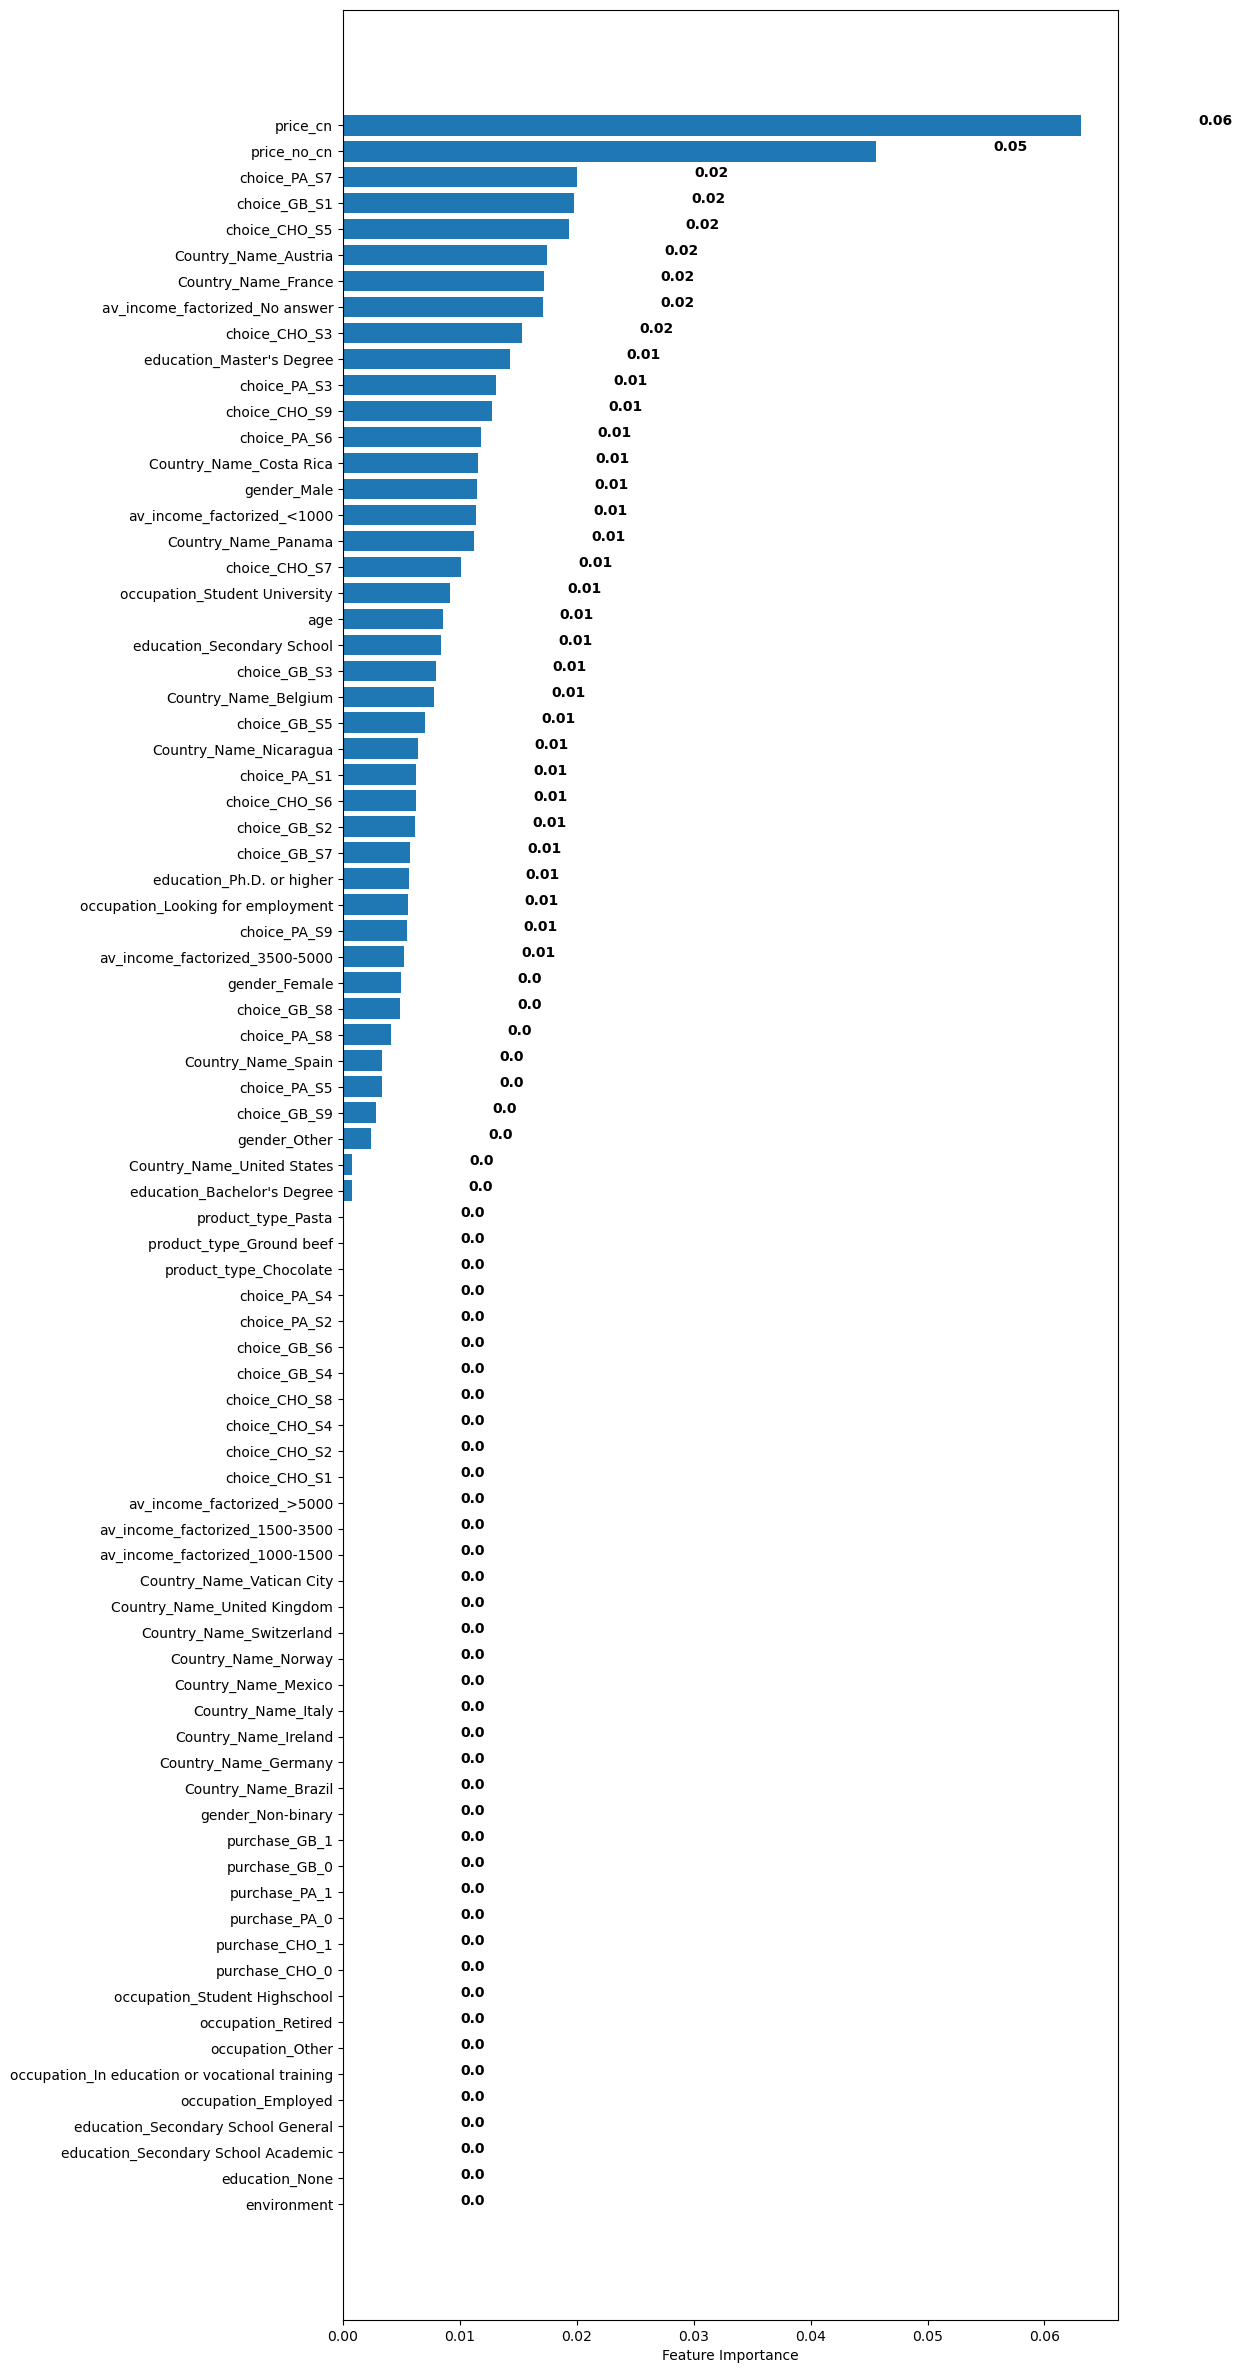

In [22]:
import matplotlib.pyplot as plt
import numpy as np

sorted_features = sorted(feature_scores.items(), key = lambda x: x[1], reverse = False)

#for feature, score in sorted_features:
#    print("Feature: ", feature, "Score: ", score)

fig, ax = plt.subplots(figsize = (10, 30))
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align = "center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.set_xlabel("Feature Importance")

for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 2)), color = "black", fontweight = "bold")
plt.show()

Due to the mutual information regression, which ckecks how changes in one variable vary with changes in the outcome-variable.
Variables with a higher score show a more similar pattern of change to the outcome than other variables.

# Logistic Regression

Unfortunately right now it is not possible to include random effects and shrinkage in the same model in any known 
Python-packages at this point, hence, a model with random effects and one with shrinkage will be tested. 

In [27]:
# import os
# os.system("pip install pymer4")

0

In [29]:
train.columns

Index(['lfdn', 'purchase_CHO', 'purchase_PA', 'purchase_GB', 'rank_GB',
       'rank_CHO', 'rank_CHEESE', 'rank_WHEAT', 'rank_TOM', 'age', 'gender',
       'country', 'education', 'occupation', 'av_income', 'environment',
       'Country_Name', 'Generation', 'av_income_factorized', 'choice',
       'decision', 'price_cn', 'price_no_cn', 'product_type'],
      dtype='object')

In [ ]:
# logistic regression with random effects
# hyperparameter optimization
# I will use train and test for this one, as pymer4 does not need one-hot-encoded features and it is easier to use categorical 
# features
import pymer4 as py

# as the task is prediction, all variables will be included in the model, no matter the possible multicollinearity
# quality of the model is defined by prediction performance conditioned on being able to estimate out-of-sample prediction
# performance as close as possible (which is described in the data preprocessing done in R)
# only "Country_Name", "av_income", and "Generation" are omitted
model_pymer = py.models.Lmer("decision ~ age + gender + country + education + occupation + environment + av_income_factorized + choice + price_cn + price_no_cn + (1 | lfdn)", data = train)

print(model_pymer.fit())

In [26]:
# logistic regression hyperparameter optimization
# using GridSearchCV for optimal resuts
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import time

# define parameters for grid search
solvers = ["newton-cg", "lbfgs", "liblinear"]
penalties = ["l2"]
c_values = [100, 10, 1.0, 0.1, 0.01]



# define grid
clf_random_grid = {"solver": solvers,
                  "penalty": penalties,
                  "C": c_values}

print(clf_random_grid)

{'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01]}


In [27]:
# initialize logistic regression and grid search
clf_optim = LogisticRegression()
clf_gs = RandomizedSearchCV(estimator = clf_optim, param_distributions = clf_random_grid, n_iter = 5, cv = 5, verbose = 2,
                           random_state = 100, n_jobs = -1, scoring = "f1")
# using f1-score (harmonic mean of precision and recall) as it works well with unbalanced data

# grid search
start_log_reg_optim = time.time()
clf_gs.fit(X_train, y_train)
end_log_reg_optim = time.time()
time_log_reg_optim = end_log_reg_optim - start_log_reg_optim

print("Run time logistic regression hyperparameter optimization: \n", np.round(time_log_reg_optim, 2) , "seconds")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
5.28 seconds


In [29]:
clf_gs.best_params_
clf_best_model = clf_gs.best_estimator_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.01}

In [24]:
# prediction using the best parameters from the grid search
clf_1 = LogisticRegression(penalty = "l1", solver = "liblinear", random_state = 100)

start_log_reg = time.time()
clf_1.fit(X_train, y_train)
end_log_reg = time.time()
time_log_reg = end_log_reg - start_log_reg

print(np.round(time_log_reg, 2), " seconds")

0.19  seconds


In [25]:
predictions_log_reg = clf_1.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix

cm_log_reg = confusion_matrix(y_test, predictions_log_reg)

<AxesSubplot:>

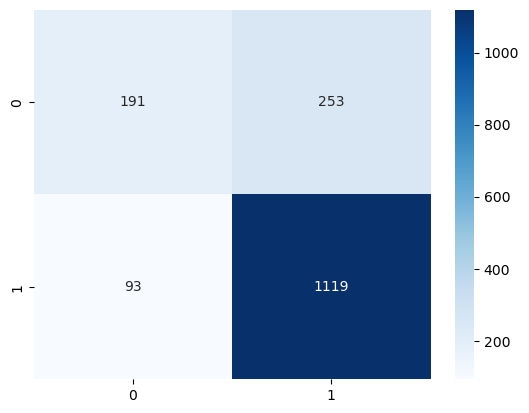

In [27]:
import seaborn as sns
import numpy as np

sns.heatmap(cm_log_reg, annot = True, fmt = "g", cmap = "Blues")

## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_1 = RandomForestClassifier(n_estimators = 1000, random_state = 0,
                             oob_score = True, max_depth = 20, 
                             min_samples_leaf = 5)
rf_1.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=1000,
                       oob_score=True, random_state=0)

In [22]:
y_test

0       1
1       1
2       1
3       0
4       1
       ..
2573    1
2574    1
2575    1
2576    1
2577    1
Name: 0, Length: 2578, dtype: int32

In [23]:
from sklearn.metrics import mean_absolute_error, r2_score

oob_score = rf_1.oob_score_
print(f'Out-of-Bag Score: {round(oob_score, 2)}')

predictions_1 = rf_1.predict(X_test)

mse_1 = mean_absolute_error(y_test, predictions_1)
print(f'Mean absolute error: {round(mse_1, 2)}')

Out-of-Bag Score: 0.86
Mean absolute error: 0.13


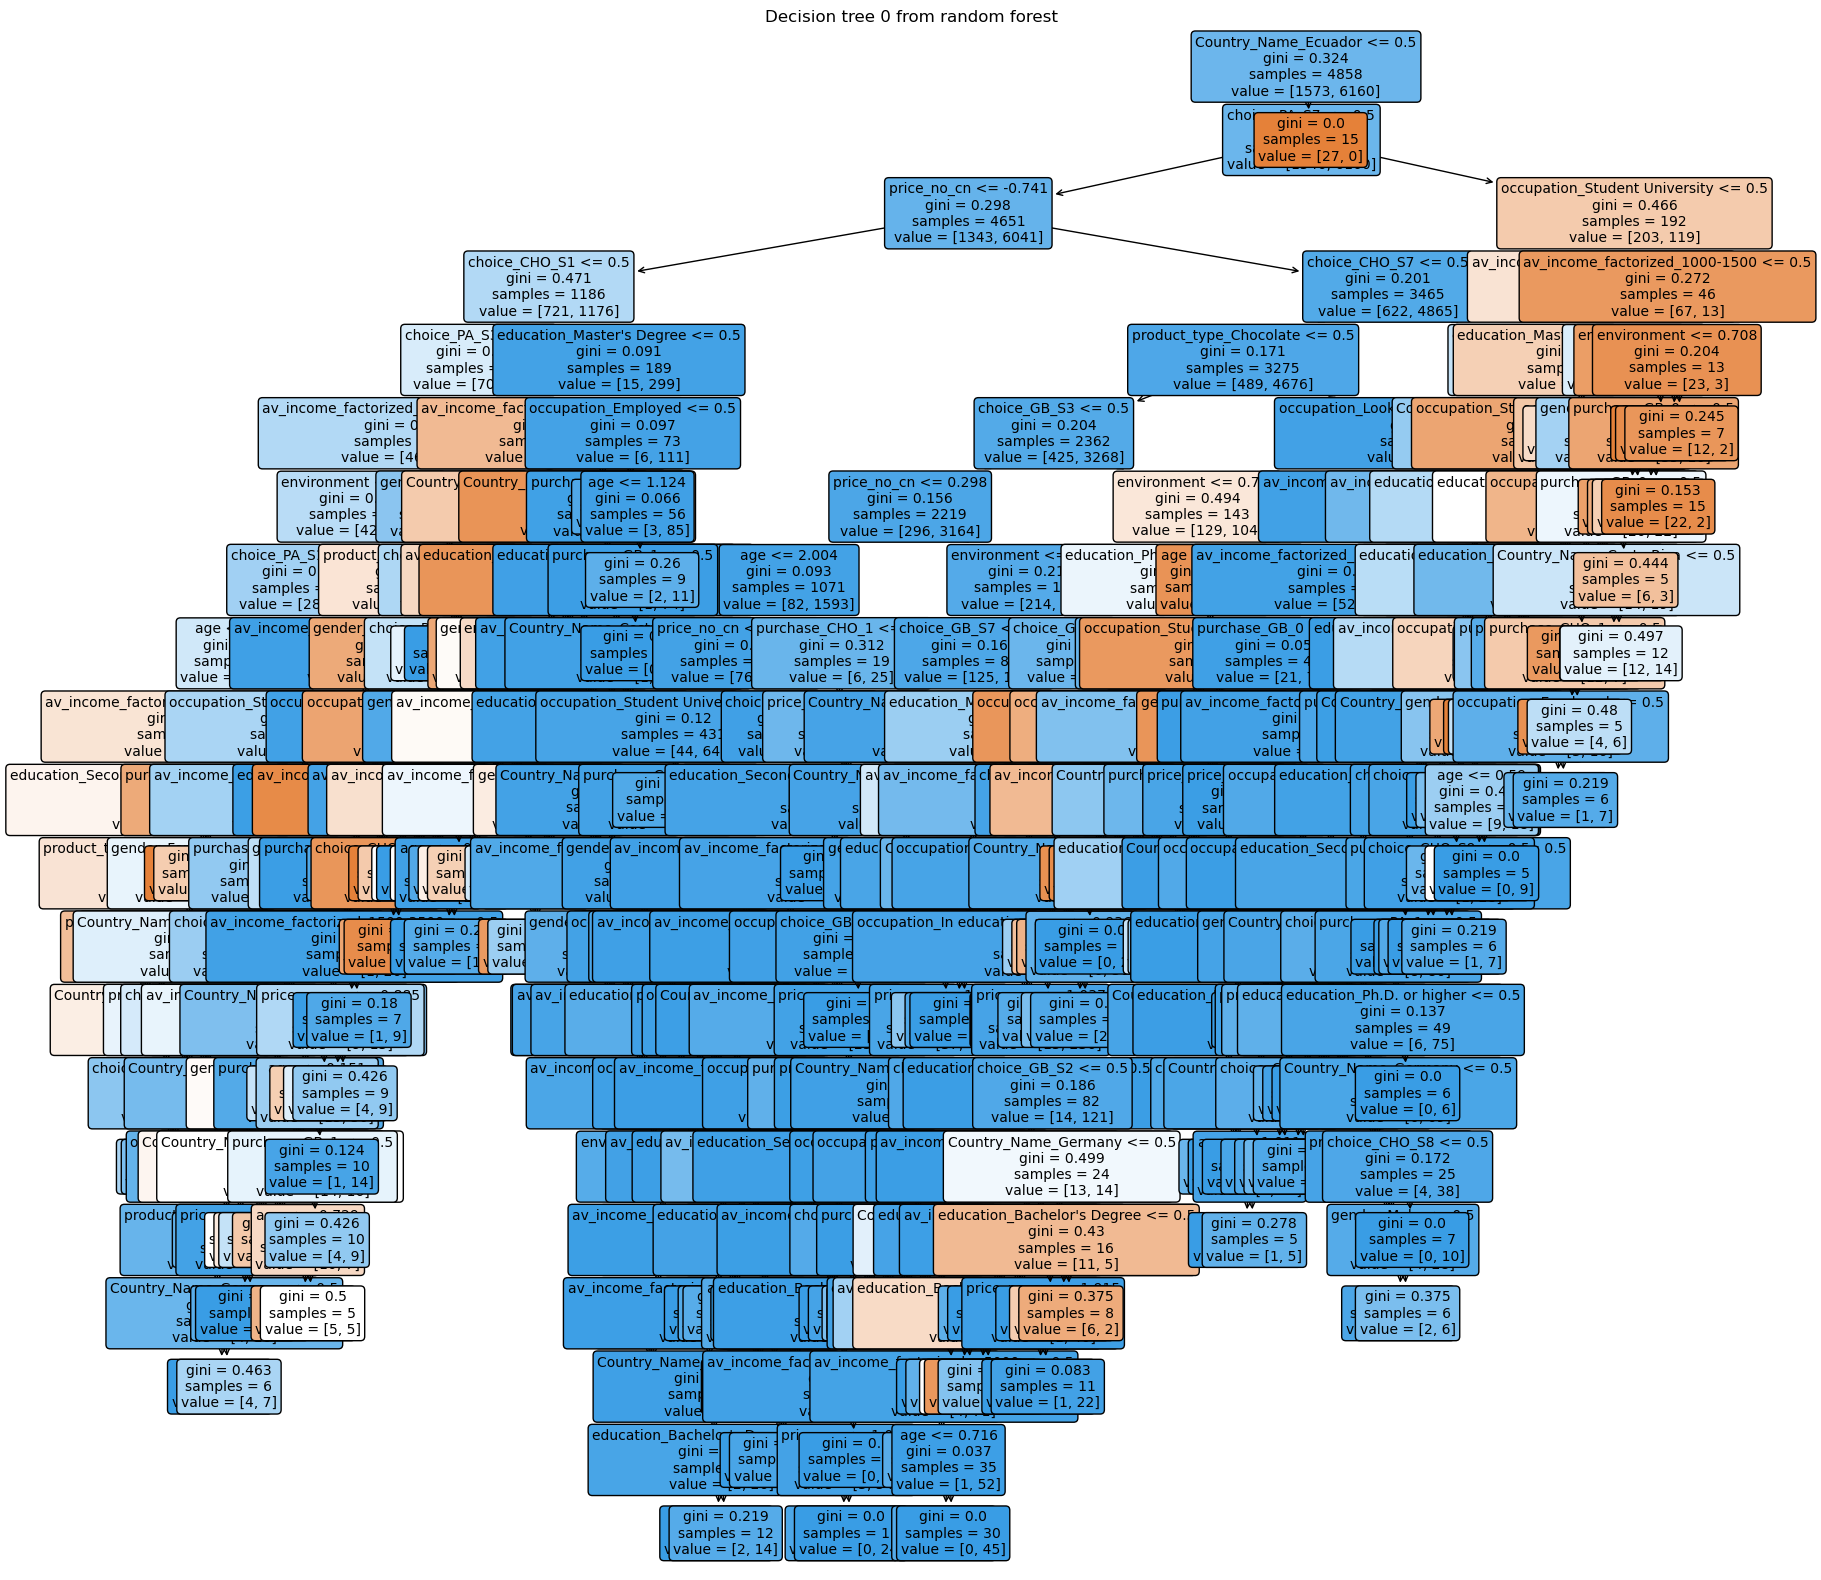

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_to_plot_1 = rf_1.estimators_[0]

plt.figure(figsize = (20, 20))
plot_tree(tree_to_plot_1, feature_names = X_train.columns,
         filled = True, rounded = True, fontsize = 10)
plt.title("Decision tree 0 from random forest")
plt.show()

In [25]:
from sklearn.metrics import confusion_matrix

cm_1 = confusion_matrix(y_test, predictions_1)

<AxesSubplot:>

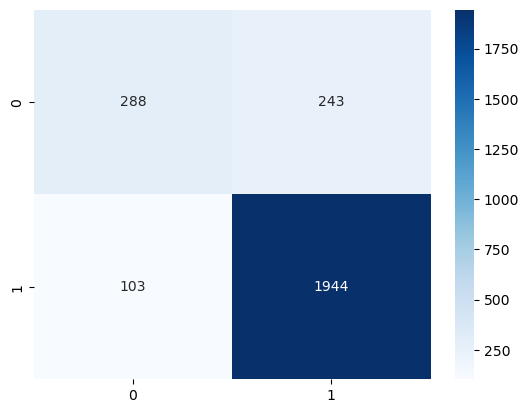

In [26]:
import seaborn as sns
import numpy as np

sns.heatmap(cm_1, annot = True, fmt = "g", cmap = "Blues")

In [27]:
# ROC and AUC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# get estimated probabilities
prediction_1_probs = rf_1.predict_proba(X_test)
prediction_1_probs = prediction_1_probs[:, 1]

# values for curve indicating random guessing
rg_1_probs = [0 for _ in range(len(X_test))]

# scores
rg_1_auc = roc_auc_score(y_test, rg_1_probs)
rf_1_auc = roc_auc_score(y_test, prediction_1_probs)

# print scores
print("Random guessing: ROC AUC=%.3f" % (rg_1_auc))
print("Random forest 1: ROC AUC=%.3f" % (rf_1_auc))

Random guessing: ROC AUC=0.500
Random forest 1: ROC AUC=0.905


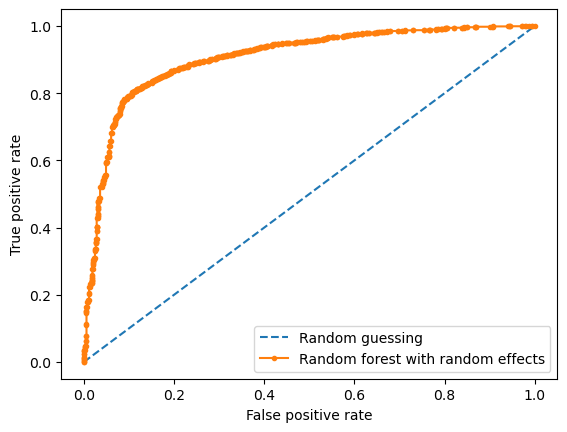

In [28]:
# get false positive and true positive rates
rg_1_fpr, rg_1_tpr, _ = roc_curve(y_test, rg_1_probs)
rf_1_fpr, rf_1_tpr, _ = roc_curve(y_test, prediction_1_probs)

plt.plot(rg_1_fpr, rg_1_tpr, linestyle = "--", label = "Random guessing")
plt.plot(rf_1_fpr, rf_1_tpr, marker = ".", label = "Random forest with random effects")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()
plt.show()

In [202]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

# precision-recall curves
precision_1, recall_1, thresholds_1 = precision_recall_curve(y_test, prediction_1_probs)

# f1 score
f1_1, auc_1 = f1_score(y_test, predictions_1), auc(recall_1, precision_1)

# print scores
print("Random forest: f1=%.3f auc=%3f" % (f1_1, auc_1))

Random forest: f1=0.918 auc=0.968710


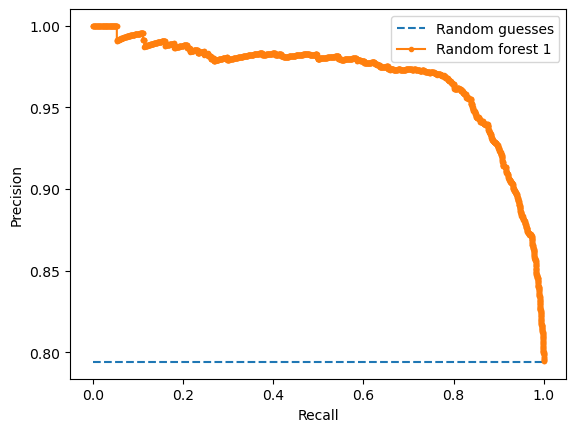

In [204]:
# plot results
import matplotlib.pyplot as plt

random_guesses = len(y_test[y_test == 1]) / len(y_test)

plt.plot([0, 1], [random_guesses, random_guesses], linestyle = "--", label = "Random guesses")
plt.plot(recall_1, precision_1, marker = ".", label = "Random forest 1")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [225]:
# grid-search parameter optimization
# number of trees
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000,
               num = 100)]
# splitting criterion
split_crit = ["gini", "entropy", "log_loss"]
# maximum tree depth
max_depth = [int(x) for x in np.linspace(start = 5, stop = 50, num = 5)]
max_depth.append(None)  # expanded until all leaves pure
# min sampels for split
min_samples_split = [10, 20, 50]
# min nodes for leafs
min_samples_leaf = [5, 10, 20]
## minimum fraction of obs in each leaf
#min_weight_fraction_leaf = [0.01, 0.02, 0.05]
# number of features for splits
max_features = ["sqrt", "log2", "None"]
# bootstrapping
bootstrap = [True, False]
# # maximum number of leaf nodes
# max_leaf_nodes = [20, 50, None]

# grid for random hyperparameter selection
random_grid = {"n_estimators": n_estimators,
              "split_crit": split_crit,
              "max_depth": max_depth,
              "min_samples_split": min_samples_split,
              "min_samples_leaf": min_samples_leaf,
              "max_features": max_features,
              "bootstrap": bootstrap}

print(random_grid)

{'n_estimators': [100, 109, 118, 127, 136, 145, 154, 163, 172, 181, 190, 200, 209, 218, 227, 236, 245, 254, 263, 272, 281, 290, 300, 309, 318, 327, 336, 345, 354, 363, 372, 381, 390, 400, 409, 418, 427, 436, 445, 454, 463, 472, 481, 490, 500, 509, 518, 527, 536, 545, 554, 563, 572, 581, 590, 600, 609, 618, 627, 636, 645, 654, 663, 672, 681, 690, 700, 709, 718, 727, 736, 745, 754, 763, 772, 781, 790, 800, 809, 818, 827, 836, 845, 854, 863, 872, 881, 890, 900, 909, 918, 927, 936, 945, 954, 963, 972, 981, 990, 1000], 'split_crit': ['gini', 'entropy', 'log_loss'], 'max_depth': [5, 16, 27, 38, 50, None], 'min_samples_split': [10, 20, 50], 'min_samples_leaf': [5, 10, 20], 'max_features': ['sqrt', 'log2', 'None'], 'bootstrap': [True, False]}


In [235]:
from pprint import pprint

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 16, 27, 38, 50, None],
 'max_features': ['sqrt', 'log2', 'None'],
 'min_samples_leaf': [5, 10, 20],
 'min_samples_split': [10, 20, 50],
 'n_estimators': [100,
                  109,
                  118,
                  127,
                  136,
                  145,
                  154,
                  163,
                  172,
                  181,
                  190,
                  200,
                  209,
                  218,
                  227,
                  236,
                  245,
                  254,
                  263,
                  272,
                  281,
                  290,
                  300,
                  309,
                  318,
                  327,
                  336,
                  345,
                  354,
                  363,
                  372,
                  381,
                  390,
                  400,
                  409,
            

In [ ]:
# training
from sklearn.model_selection import RandomizedSearchCV

rf_2 = RandomForestClassifier()

rf_gs = RandomizedSearchCV(estimator = rf_2, param_distributions = random_grid, n_iter = 5, cv = 5, verbose = 2, 
                           random_state = 0, n_jobs = -1)

rf_gs.fit(X_train, y_train)

In [ ]:
rf_gs.best_params_

In [ ]:
# evaluation
def evaluate(model, X_test, y_test):
    predictions_temp = model.predict(X_test)
    errors = abs(predictions_temp - y_test)
    # code accuracy and other scores depending on which metric is supposed to be maximized
    acc = 100 - (np.sum(errors) / len(y_test))
    print("Model performance")
    print("Average error: {:0.4f} degrees.".format(np.mean(errors)))
    print("Accuracy = {:0.2f}%.".format(accuracy))
    
    return accuracy

In [ ]:
base_model = RandomForestClassifier(n_estimators = 1000, random_state = 0,
                                    oob_score = True, max_depth = 20, 
                                    min_samples_leaf = 5)
rf_1.fit(X_train, y_train)
base_acc = evaluate(base_model, X_test, y_test)

In [ ]:
best_model = rf_gs.best_estimator_
best_acc = evaluate(best_model, X_test, y_test)

In [ ]:
print("Improvement of {:0.2f}%".format(100 * (best_acc - base_acc) / base_acc))

In [ ]:
# non-random grid-search for further more precise optimization
from sklearn.model_selection import GridSearchCV

precise_grid = {"n_estimators": [],
                "split_crit": [],
                "max_depth": [],
                "min_samples_split": [],
                "min_samples_leaf": [],
                "max_features": [],
                "bootstrap": []}

print(precise_grid)

In [ ]:
# base model for grid search
rf_gs_precise = RandomForestRegressor()

# grid search
gs_precise = GridSearchCV(estimator = rf_gs_precise, param_grid = precise_grid,
                         cv = 5, n_jobs = -1, verbose = 2)

In [ ]:
gs_precise.fit(X_train, y_train)
gs_precise.best_params_

In [ ]:
best_grid_precise = gs_precise.best_estimator_
best_grid_precise_acc = evaluate(best_grid_precise, X_test, y_test)

In [ ]:
print("Improvement of {:0.2f}%.".format(100 * (best_grid_precise_acc - base_acc) / base_acc))

In [21]:
# lets try mixed-effects random forest
#os.system("pip install merf")

0

In [193]:
from merf import MERF
import numpy as np

Z_train = np.ones((len(X_train), 1))
Z_test = np.ones((len(X_test), 1))

clusters_train = train["lfdn"]
clusters_test = test["lfdn"]

Z_train.shape, Z_test.shape, clusters_train.shape, clusters_test.shape

((7733, 1), (2578, 1), (7733,), (2578,))

In [194]:
X_train.shape, Z_train.shape, clusters_train.shape, y_train.shape

((7733, 82), (7733, 1), (7733,), (7733,))

In [195]:
merf_1 = MERF()
merf_1.fit(X_train, Z_train, clusters_train, y_train)

preds_merf = merf_1.predict(X_test, Z_test, clusters_test)

INFO     [merf.py:307] Training GLL is -19694.061755389994 at iteration 1.
INFO     [merf.py:307] Training GLL is -27284.038507795634 at iteration 2.
INFO     [merf.py:307] Training GLL is -27691.99679298359 at iteration 3.
INFO     [merf.py:307] Training GLL is -27655.189388518993 at iteration 4.
INFO     [merf.py:307] Training GLL is -27668.790222287316 at iteration 5.
INFO     [merf.py:307] Training GLL is -27680.875534441802 at iteration 6.
INFO     [merf.py:307] Training GLL is -27663.607063341413 at iteration 7.
INFO     [merf.py:307] Training GLL is -27694.034525907296 at iteration 8.
INFO     [merf.py:307] Training GLL is -27737.601377270275 at iteration 9.
INFO     [merf.py:307] Training GLL is -27691.962705252317 at iteration 10.
INFO     [merf.py:307] Training GLL is -27764.779931841294 at iteration 11.
INFO     [merf.py:307] Training GLL is -27759.266084226656 at iteration 12.
INFO     [merf.py:307] Training GLL is -27768.00014828744 at iteration 13.
INFO     [merf.py:307] 

<AxesSubplot:>

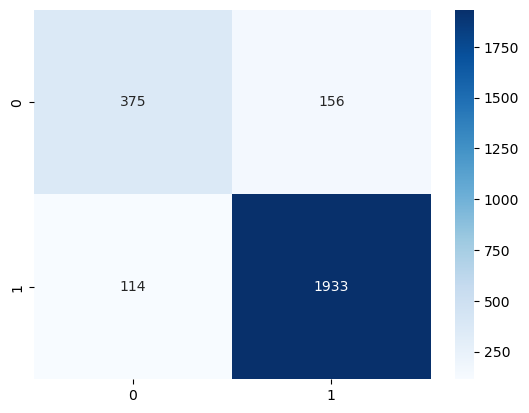

In [196]:
cm_2 = confusion_matrix(y_test.ravel(), round(pd.DataFrame(preds_merf)))
sns.heatmap(cm_2, annot = True, fmt = "g", cmap = "Blues")

## Support vector machines

In [26]:
from sklearn import svm

svm_1 = svm.SVC(kernel = "linear")
# sigmoid also kind of works, overfits with other kernel functions

svm_1.fit(X_train, y_train)

preds_svm = svm_1.predict(X_test)

<AxesSubplot:>

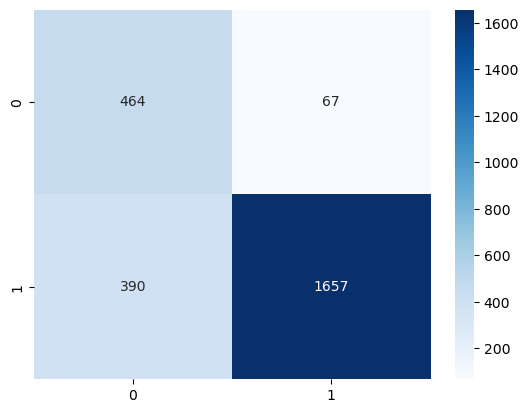

In [27]:
cm_3 = confusion_matrix(y_test.ravel(), preds_svm)
sns.heatmap(cm_3, annot = True, fmt = "g", cmap = "Blues")

## Neural net

In [39]:
# specify train and test datasets
from torch.utils.data import Dataset, DataLoader

# define classes for train, validation, and test data
class TrainDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def __len__(self):
        return self.X.shape[0]
    def __getitem__(self):
        x = self.X
        y = self.y
        return x, y
    
class ValidDataset(TrainDataset):  # ValidDataset inherits attributes of TrainDataset
    def __getitem__(self):
        x = self.X
        return x

class TestDataset(TrainDataset):
    def __getitem__(self):
        x = self.x
        return x

# transform datasets using the classes
train_set = TrainDataset(X_train, y_train)
valid_set = ValidDataset(X_valid, y_valid)
test_set = TestDataset(X_test, y_test)

# define batch-size (first hyperparameter)
batch_size = 8

# define data-loaders using the defined batch_size
train_loader = DataLoader(train_set, batch_size = batch_size, shuffle = True)
valid_loader = DataLoader(valid_set, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test_set, batch_size = batch_size, shuffle = False)

In [40]:
# build the multi-layer perceptron
import torch
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

feature_num = X_train.shape[1]
hidden_size = 20
output_classes = 1
activation_function = nn.ReLU()

# simple MLP, one layer so far, we will add more later
class MLP(nn.Module):
    def __init__(self, feature_num, hidden_size, output_classes, activation_function):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(feature_num, hidden_size)
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.linear3 = nn.Linear(hidden_size, output_classes)
        self.activation_function = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.activation_function(self.linear1(x))
        x = self.activation_function(self.linear2(x))
        x = self.activation_function(self.linear3(x))
        out = self.sigmoid(x)  # sigmoid for classification
        return out

In [41]:
# initialize model
model = MLP(feature_num, hidden_size, output_classes, activation_function).to(device)
# define optimizer and oprimization criterion
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.MSELoss()

print(model)

MLP(
  (linear1): Linear(in_features=82, out_features=20, bias=True)
  (linear2): Linear(in_features=20, out_features=20, bias=True)
  (linear3): Linear(in_features=20, out_features=1, bias=True)
  (activation_function): ReLU()
  (sigmoid): Sigmoid()
)


In [71]:
# define number of epochs (next hyperparameter)
epochs = 1


# function to train model
def train_model(model, train_loader, optimizer, criterion, batch_size, device):
    
    train_loss = 0
    train_acc = 0

    model.train()
    #for batch_idx, batch_data in enumerate(train_loader):
    if 1 == 1:    
        # reset gradient
        optimizer.zero_grad()
        
        # define data for this iteration
        x, y = torch.from_numpy(X_train.values), torch.from_numpy(y_train.values)  #batch_data
        x = x.to(device)
        y = y.to(device)
        
        # run data trough model
        output = model(x.to(torch.float32))
        print(output)
        
        # calculate loss
        loss = criterion(output, y.to(torch.float32))
        loss.backward()
        acc = (output.round() == y).float().mean()
        
        # accuracy and loss for return
        train_loss += loss.item()
        train_acc += acc.item()
        
        # update parameters
        optimizer.step()
        
    return train_loss / len(y), train_acc / len(y)
        
        
def evaluate_model(model, valid_loader, criterion, batch_size, device):
    
    valid_loss = 0
    valid_acc = 0
    
    model.eval()
    
    with torch.no_grad():
        #for batch_idx, batch_data in enumerate(valid_loader):
            x, y = torch.from_numpy(X_valid.values), torch.from_numpy(y_valid.values)  #batch_data
            x = x.to(device)
            y = y.to(device)
            
            output = model(x.to(torch.float32))
            
            loss = criterion(output, y)
            acc = (output.round() == y).float().mean()
            
            valid_loss += loss.item()
            valid_acc += acc.item()
            
    return valid_loss / len(y), valid_acc / len(y)
    

def test_model(model, test_loader, criterion, batch_size, device):
    
    test_loss = 0
    test_acc = 0
    
    model.eval()
    
    with torch.no_grad():
        #for batch_idx, batch_data in enumerate(test_loader):
            x, y = torch.from_numpy(X_test.values), torch.from_numpy(y_test.values)  #batch_data
            x = x.to_device()
            y = y.to_device()
            
            output = model(x.to(torch.float32))
            
            loss = criterion(output, y)
            acc = (output.round() == y).float().mean()
            
            test_loss += loss.item()
            test_acc += acc.item()
            
    return output, test_loss / len(y), test_acc / len(y)

In [72]:
# model training
import numpy as np

best_loss = - np.inf
best_weights = None

for epoch in range(epochs):
    
    train_loss, train_acc = train_model(model, train_loader, optimizer, criterion, batch_size, device)
    valid_loss, valid_acc = evaluate_model(model, valid_loader, criterion, batch_size, device)
    
    if valid_loss > best_loss:
        best_loss = valid_loss
        torch.save(model.state_dict(), "mlp_1.pt")
    
    print(f"Epoch: {epoch+1:02}")
    print(f"\Train Loss: {train_loss:.3f} | Train Accuracy: {train_acc:.2f}%")
    print(f"\Validation Loss: {valid_loss:.3f} | Validation Accuracy: {valid_acc:.2f}%")

tensor([[0.5000],
        [0.5000],
        [0.5000],
        ...,
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)
Epoch: 01
\Train Loss: 0.000 | Train Accuracy: 0.00%
\Validation Loss: 0.000 | Validation Accuracy: 0.00%


In [ ]:
# try model accuracy on test data
model.state_dict(torch.load("mlp_1.pt"))

predictions_mlp, test_loss, test_acc = evaluate(model, test_loader, criterion, device)

print(f"Test Loss: {test_loss:.3f} | Test Accuracy: {test_acc:.2f}")

In [ ]:
cm_4 = confusion_matrix(y_test.ravel(), predictions_mlp)
sns.heatmap(cm_4, annot = True, fmt = "g", cmap = "Blues")

In [96]:
X_train

,age,environment,price_cn,price_no_cn,education_Bachelor's Degree,education_Master's Degree,education_None,education_Ph.D. or higher,education_Secondary School,education_Secondary School Academic,...,choice_PA_S3,choice_PA_S4,choice_PA_S5,choice_PA_S6,choice_PA_S7,choice_PA_S8,choice_PA_S9,product_type_Chocolate,product_type_Ground beef,product_type_Pasta
0,0.904578,-0.517201,0.015235,-0.798877,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.721234,-0.517201,1.474758,0.586947,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.281496,-0.517201,-0.393431,-0.798877,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.155857,-0.517201,0.015235,-0.798877,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.653299,-0.517201,0.015235,-0.798877,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728,-0.917194,-0.517201,-0.977241,-0.683392,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7729,0.778938,-0.517201,-0.977241,-0.972105,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7730,1.281496,-0.517201,0.015235,-0.798877,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7731,1.281496,-0.517201,0.599044,2.376971,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [93]:
class model_2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 20)
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(20, 20)
        self.act2 = nn.ReLU()
        self.layer3 = nn.Linear(20, 20)
        self.act3 = nn.ReLU()
        self.output = nn.Linear(20, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.act3(self.layer3(x))
        x = self.sigmoid(self.output(x))
        return x

In [94]:
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm

def model_train(model, X_train, y_train, X_valid, y_valid):
    loss_fn = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr = 0.01)
    
    n_epochs = 10
    batch_size = 8
    batch_start = torch.arange(0, len(X_train), batch_size)
    
    best_acc = - np.inf
    best_weights = None
    
    for epoch in range(n_epochs):
        model.train()
        with tqdm.tqdm(batch_start, unit = "batch", mininterval = 0, disable = True) as bar:
            bar.set_description(f"Epoch {epoch}")
            for start in bar:
                # take a batch
                X_batch = X_train.iloc[start:start + batch_size]
                y_batch = y_train.iloc[start:start + batch_size]
                
                y_pred = model(X_batch)
                loss = loss_fn(y_pred, y_batch)
                
                optimizer.zero_grad()
                loss.backward()
                
                optimizer.step()
                
                acc = (y_pred.round() == y_batch).float().mean()
                bar.set_postfix(
                    loss = float(loss),
                    acc = float(acc)
                )
        
        model.eval()
        y_pred = model(X_valid)
        acc = (y_pred.round() == y_val).float().mean()
        acc = float(acc)
        if acc > best_acc:
            best_acc = acc
            best_weights = copy.deepcopy(model.state_dict())
            
    model.load_state_dict(best_weights)
    return best_acc

In [101]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits = 5, shuffle = True)
cv_scores = []
for train, test in kfold.split(X_train, y_train):
    print(train)
    model = MLP(feature_num, hidden_size, output_classes, activation_function).to(device)
    acc = model_train(model, X_train[train], y_train[train], X_train[test], y_train[test])
    print("Accuracy: %.2f" % acc)
    cv_scores_wide.append(acc)

acc = np.mean(cv_scores)
std = np.std(cv_scores)
print("Accuracy: %.2f%% (+/- %.2f%%)" % (acc*100, std*100))

[   1    2    3 ... 7729 7730 7731]


KeyError: "None of [Int64Index([   1,    2,    3,    5,    6,    8,   10,   11,   12,   13,\n            ...\n            7721, 7722, 7724, 7725, 7726, 7727, 7728, 7729, 7730, 7731],\n           dtype='int64', length=6186)] are in the [columns]"

In [85]:
X_train.iloc[4:10]

,age,environment,price_cn,price_no_cn,education_Bachelor's Degree,education_Master's Degree,education_None,education_Ph.D. or higher,education_Secondary School,education_Secondary School Academic,...,choice_PA_S3,choice_PA_S4,choice_PA_S5,choice_PA_S6,choice_PA_S7,choice_PA_S8,choice_PA_S9,product_type_Chocolate,product_type_Ground beef,product_type_Pasta
4,0.653299,-0.517201,0.015235,-0.798877,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,-0.791554,-0.517201,-0.393431,-0.972105,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,-0.854374,-0.517201,-0.802098,-0.798877,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,-0.980013,-0.517201,-0.977241,-0.683392,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,-0.791554,1.933483,-0.977241,-0.394678,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,1.532775,-0.517201,2.408853,1.453088,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# other approach for now

In [80]:
import tensorflow as tf
import keras
from tensorflow.keras import layers, models

model_2 = models.Sequential()

layer_1 = layers.Dense(1000, activation = "relu")
layer_3 = layers.Dense(1, activation = "sigmoid")

model_2.add(layers.InputLayer(input_shape = (X_train.shape[1],)))
model_2.add(layer_1)
model_2.add(layer_3)

sgd = keras.optimizers.SGD(learning_rate = 0.1)

In [83]:
model_2.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1000)              83000     
                                                                 
 dense_8 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 84,001
Trainable params: 84,001
Non-trainable params: 0
_________________________________________________________________


In [84]:
history_2 = model_2.fit(X_train_np, y_train, validation_data = (X_test_np, y_test), epochs = 10, batch_size = 8)
model_2_eval = model_2.evaluate(X_test, y_test)
model_2_eval

Epoch 1/10
967/967 [==============================] - 1s 903us/step - loss: 0.3902 - accuracy: 0.8307 - val_loss: 0.3359 - val_accuracy: 0.8503
Epoch 2/10
967/967 [==============================] - 1s 819us/step - loss: 0.3521 - accuracy: 0.8452 - val_loss: 0.3252 - val_accuracy: 0.8549
Epoch 3/10
967/967 [==============================] - 1s 855us/step - loss: 0.3374 - accuracy: 0.8528 - val_loss: 0.3082 - val_accuracy: 0.8666
Epoch 4/10
967/967 [==============================] - 1s 812us/step - loss: 0.3254 - accuracy: 0.8603 - val_loss: 0.3295 - val_accuracy: 0.8588
Epoch 5/10
967/967 [==============================] - 1s 836us/step - loss: 0.3231 - accuracy: 0.8583 - val_loss: 0.3188 - val_accuracy: 0.8530
Epoch 6/10
967/967 [==============================] - 1s 823us/step - loss: 0.3111 - accuracy: 0.8628 - val_loss: 0.3065 - val_accuracy: 0.8646
Epoch 7/10
967/967 [==============================] - 1s 815us/step - loss: 0.3075 - accuracy: 0.8654 - val_loss: 0.3271 - val_accuracy:

[0.305076539516449, 0.8727695941925049]

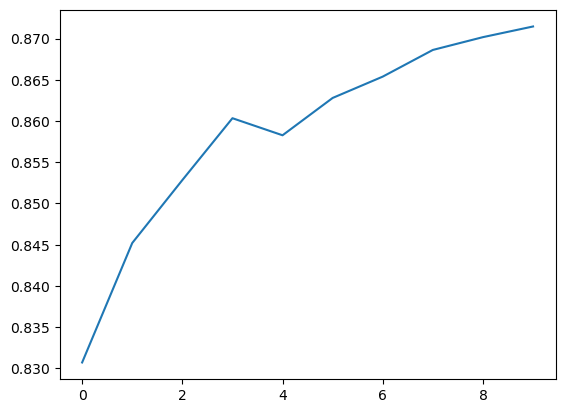

In [85]:
import matplotlib.pyplot as plt

plt.plot(history_2.history["accuracy"])
plt.show()

81/81 [==============================] - 0s 503us/step


<AxesSubplot:>

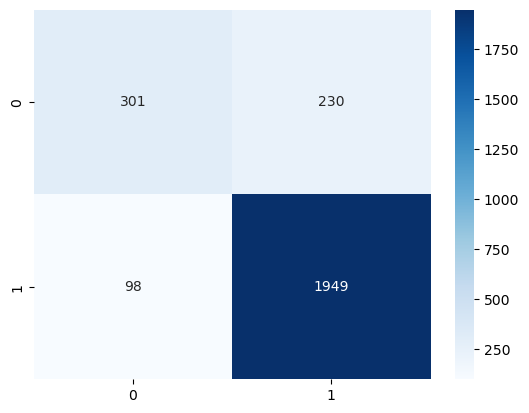

In [86]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

preds_mlp = np.round(model_2.predict(X_test_np), 0)

cm_5 = confusion_matrix(y_test, preds_mlp)

sns.heatmap(cm_5, annot = True, fmt = "g", cmap = "Blues")

In [58]:
y_train.value_counts()

2    6155
1    1578
Name: decision, dtype: int64

In [59]:
y_train = pd.DataFrame(y_train)
y_train = y_train.replace({1:0, 2:1})
y_train.value_counts()

decision
1           6155
0           1578
dtype: int64

In [71]:
y_test = pd.DataFrame(y_test)
y_test = y_test.replace({1:0, 2:1})
y_test.value_counts()

decision
1           2047
0            531
dtype: int64

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10311 entries, 0 to 10310
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lfdn                  10311 non-null  int64  
 1   purchase_CHO          10311 non-null  int64  
 2   purchase_PA           10311 non-null  int64  
 3   purchase_GB           10311 non-null  int64  
 4   rank_GB               10311 non-null  int64  
 5   rank_CHO              10311 non-null  int64  
 6   rank_CHEESE           10311 non-null  int64  
 7   rank_WHEAT            10311 non-null  int64  
 8   rank_TOM              10311 non-null  int64  
 9   age                   10311 non-null  int64  
 10  gender                10311 non-null  object 
 11  country               10311 non-null  int64  
 12  education             10311 non-null  object 
 13  occupation            10311 non-null  object 
 14  av_income             10311 non-null  int64  
 15  environment        

In [62]:
X_train_np = np.array(X_train)
y_train_np = y_train.values

X_train_np.shape, y_train_np.shape

((7733, 82), (7733, 1))

In [63]:
X_train_np

array([[54.  ,  0.  ,  2.49, ...,  0.  ,  0.  ,  1.  ],
       [67.  ,  0.  ,  4.99, ...,  0.  ,  1.  ,  0.  ],
       [60.  ,  0.  ,  1.79, ...,  0.  ,  0.  ,  1.  ],
       ...,
       [60.  ,  0.  ,  2.49, ...,  0.  ,  0.  ,  1.  ],
       [60.  ,  0.  ,  3.49, ...,  0.  ,  1.  ,  0.  ],
       [43.  ,  1.  ,  1.79, ...,  0.  ,  0.  ,  1.  ]])

In [67]:
model = Sequential()
model.add(Dense(16, input_shape = (X_train_np.shape[1],), activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.summary()

model.compile(optimizer = "Adam",
             loss = "binary_crossentropy",
             metrics = ["accuracy"])

es = EarlyStopping(monitor = "val_accuracy",
                  mode = "max",
                  patience = 10,
                  restore_best_weights = True)

history = model.fit(X_train_np,
                   y_train_np,
                   callbacks=[es],
                   epochs=80,
                   batch_size = 10,
                   validation_split = 0.2,
                   shuffle = True,
                   verbose = 1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                1328      
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,617
Trainable params: 1,617
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
619/619 [==============================] - 1s 1ms/step - loss: 0.4987 - accuracy: 0.7892 - val_loss: 0.4968 - val_accuracy: 0.7757
Epoch 2/80
619/619 [==============================] - 1s 841us/step - loss: 0.3800 - accuracy: 0.8251 - val_loss: 0.3753 - val_accuracy: 0.8274
Epoch 3/80
619/619 [==========

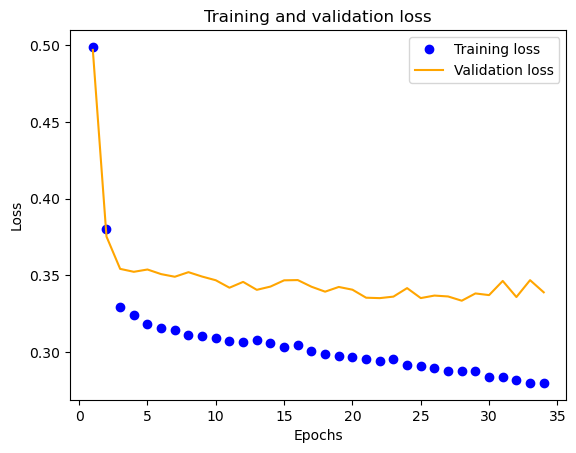

In [69]:
history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label = "Training loss")
plt.plot(epochs, val_loss_values, "orange", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

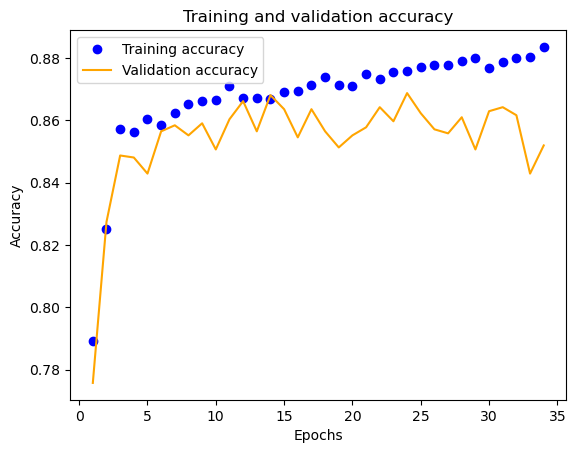

0.8687782883644104

In [70]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label = "Training accuracy")
plt.plot(epochs, val_acc, "orange", label = "Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

np.max(val_acc)

In [73]:
X_test_np = np.array(X_test)

In [76]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds_bmlp = np.round(model.predict(X_test_np), 0)

print(confusion_matrix(y_test, preds_bmlp))

print(classification_report(y_test, preds_bmlp))

81/81 [==============================] - 0s 424us/step
[[ 279  252]
 [  91 1956]]
              precision    recall  f1-score   support

           0       0.75      0.53      0.62       531
           1       0.89      0.96      0.92      2047

    accuracy                           0.87      2578
   macro avg       0.82      0.74      0.77      2578
weighted avg       0.86      0.87      0.86      2578



<AxesSubplot:>

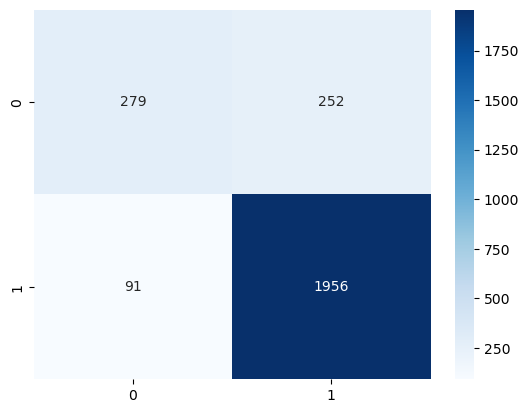

In [79]:
import seaborn as sns

cm_6 = confusion_matrix(y_test, preds_bmlp)
sns.heatmap(cm_6, annot = True, fmt = "g", cmap = "Blues")

In [29]:
# import os 
# os.system("pip install pykan")

0

In [23]:
from kan import *

model = KAN(width = [len(X_train.columns), 50, 50, 1], grid = 5, k = 3, seed = 0)

In [37]:
# create dataset for training
dataset_kan = {}
dataset_kan["train_input"] = torch.from_numpy(X_train[:20].values).float().to(torch.device("cpu"))
dataset_kan["test_input"] = torch.from_numpy(X_test[:20].values).float().to(torch.device("cpu"))
dataset_kan["train_label"] = torch.from_numpy(y_train[:20].values).float().to(torch.device("cpu"))
dataset_kan["test_label"] = torch.from_numpy(y_test[:20].values).float().to(torch.device("cpu"))

In [34]:
import torch

model(torch.from_numpy(X_train.values).float().to(torch.device("cpu")));
model.plot(beta = 100)

KeyboardInterrupt: 

<Figure size 200x200 with 0 Axes>

In [38]:
model.train(dataset_kan, opt = "LBFGS", steps = 2, lamb = 0.01, lamb_entropy = 10.);

description:   0%|                                                            | 0/2 [16:08<?, ?it/s]
train loss: 2.45e-01 | test loss: 7.38e-01 | reg: 4.88e+02 : 100%|████| 2/2 [01:14<00:00, 37.07s/it]


KeyboardInterrupt: 

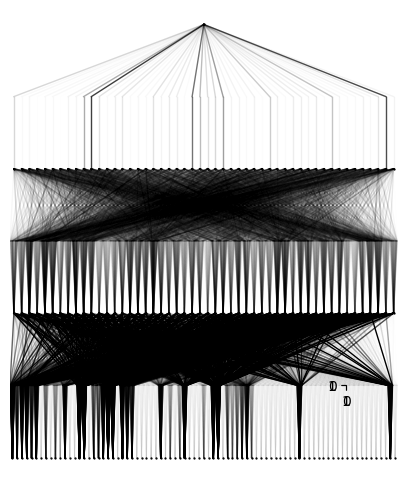

In [41]:
model.plot()

<AxesSubplot:>

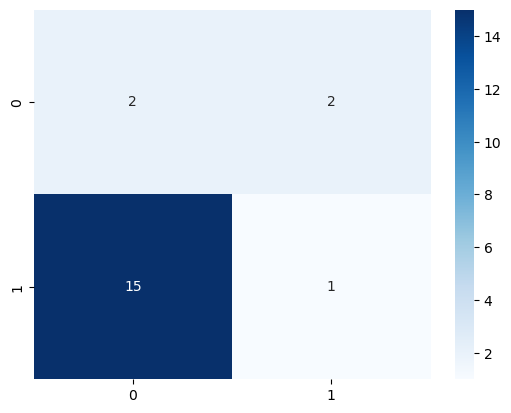

In [51]:
kan_predictions = torch.round(model(dataset_kan["test_input"])[:,0])

from sklearn.metrics import confusion_matrix

kan_predictions = kan_predictions.detach().numpy()
kan_predictions[kan_predictions == 1.] = 0.
kan_predictions[kan_predictions == 2.] = 1.
kan_predictions
cm_kan = confusion_matrix(y_test[:20], kan_predictions)

import seaborn as sns
import numpy as np

sns.heatmap(cm_kan, annot = True, fmt = "g", cmap = "Blues")

In [52]:
kan_predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0.], dtype=float32)

In [49]:
y_test[:20]

0     1
1     1
2     1
3     1
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    1
12    1
13    1
14    0
15    0
16    1
17    1
18    1
19    1
Name: decision, dtype: int64

# Gaussian Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

gnb_1 = GaussianNB()
gnb_1.fit(X_train, y_train)

gnb_predictions = gnb_1.predict(X_test)



In [24]:
from sklearn.metrics import confusion_matrix

cm_gnb = confusion_matrix(y_test, gnb_predictions)

<AxesSubplot:>

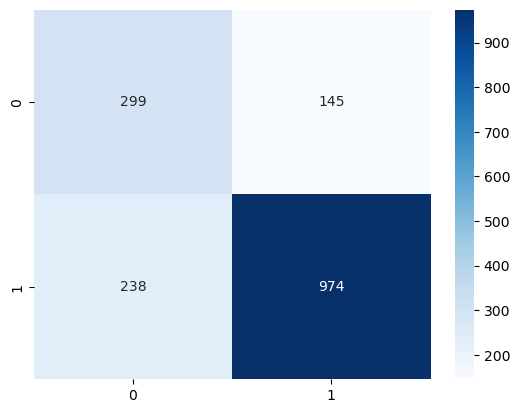

In [25]:
import seaborn as sns
import numpy as np

sns.heatmap(cm_gnb, annot = True, fmt = "g", cmap = "Blues")